0\. **Intro**

We group $N$ samples of $k$ random variables on a $k\times N$ data matrix $\mathbf{M}$. Recenter it around a $k\times N$ mean matrix $(\mathbf{\mu})_{ij} = \overline{M_i}$ so that $\mathbf{X}=\mathbf{M}-\mathbf{\mu}$

The covariance matrix can be calculated as $\dfrac{\mathbf{X}\cdot\mathbf{X}^T}{N-1}$

It is $k\times k$ and we wish to diagonalize it to find the Principal Components.
Another way to arrive at this result is through SVD (Singular Value Decomposition), which is a generalization of the eigendecomposition

For a general $k\times N$ matrix $\mathbf{X}$ the SVD is $\mathbf{X}=\mathbf{U}\mathbf{D}\mathbf{V}^T$ where $U$ is a $k\times k$ orthogonal matrix with the left singular vectors as columns, $D$ is a diagonal $k\times N$ matrix with the singular values as entries and $V$ is an orthogonal $N\times N$ matrix with the right singular vectors as columns.

This is closely related to the PCA.

$\mathbf{X}\cdot\mathbf{X^T}=\mathbf{UDV^TVD^TU^T}=\mathbf{UD^2U^{-1}}$

So the eigenvectors of the covariance matrix are the left singular vectors of the data matrix and the eigenvalues are the diagonal entries of $D^2/(N-1)$


In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.linalg as la

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [ ]:
#Generate data
N = 1000
x1 = np.random.normal(0, 1, size=(1, N)) #N samples from N(0,1) in a column vector
x2 = np.random.normal(0, 3, size=(1, N)) + x1
x3 = 2*x1 + x2
X = np.concatenate((x1, x2, x3), axis=0)

#Compute covariance
#print(np.cov(X))
muX = np.mean(X, axis=1).reshape(3,1)
W = X - muX
cov = W.dot(W.T)/(N-1)

#Compute eigendec.
l, V = la.eig(cov)
print(np.real_if_close(l)) #eigenvalues

#Compute SVD
U, S, R = la.svd(W)
pcv = S**2/(N-1)

#Reduce to first two
var = np.sum(pcv[:2])/np.sum(pcv)
print(var)
#We get 1, beacause the third variable is entirely dependent on the first two

#Redefine data
Wp = np.matmul(V.T, W)
print(U)
print(np.cov(Wp))

[ 2.75932532e+01 -1.83863589e-15  2.03698489e+00]
1.0
[[-0.11473731  0.5658345  -0.81649658]
 [-0.57826559 -0.70635843 -0.40824829]
 [-0.80774021  0.42531057  0.40824829]]
[[ 2.75932532e+01 -2.17023845e-15 -4.69427633e-15]
 [-2.17023845e-15  5.10858353e-30  3.16330152e-15]
 [-4.69427633e-15  3.16330152e-15  2.03698489e+00]]


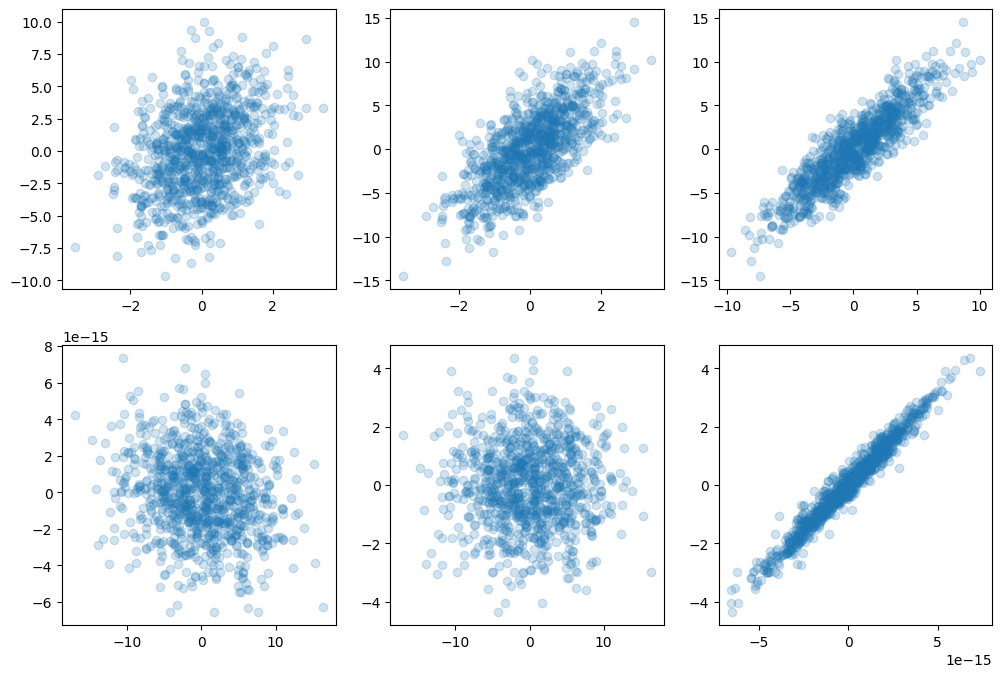

In [ ]:
#plot the data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
a = [(0,1), (0,2), (1,2)]
for i in range(3):
  ax[0,i].scatter(W[a[i][0],:], W[a[i][1],:], alpha=0.2)
  ax[1,i].scatter(Wp[a[i][0],:], Wp[a[i][1],:], alpha=0.2)


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [ ]:
sig = 1/50
for i in range(10):
  W = W + np.random.normal(0, sig, size=(3,N))

U, S, R = la.svd(W)
pcv = S**2/(N-1)
var = np.sum(pcv[:2])/np.sum(pcv)
print(var)

#Redefine data
Wp = np.matmul(U.T, W)
print(U)
print(np.cov(Wp))

0.9995864032822065
[[-0.11459807  0.56410592 -0.81771132]
 [-0.5788411  -0.70688002 -0.40652628]
 [-0.80734767  0.42673779  0.40753477]]
[[ 2.76192802e+01  1.99404220e-06  2.34894052e-05]
 [ 1.99404220e-06  2.02692994e+00 -1.20905116e-06]
 [ 2.34894052e-05 -1.20905116e-06  1.22524223e-02]]


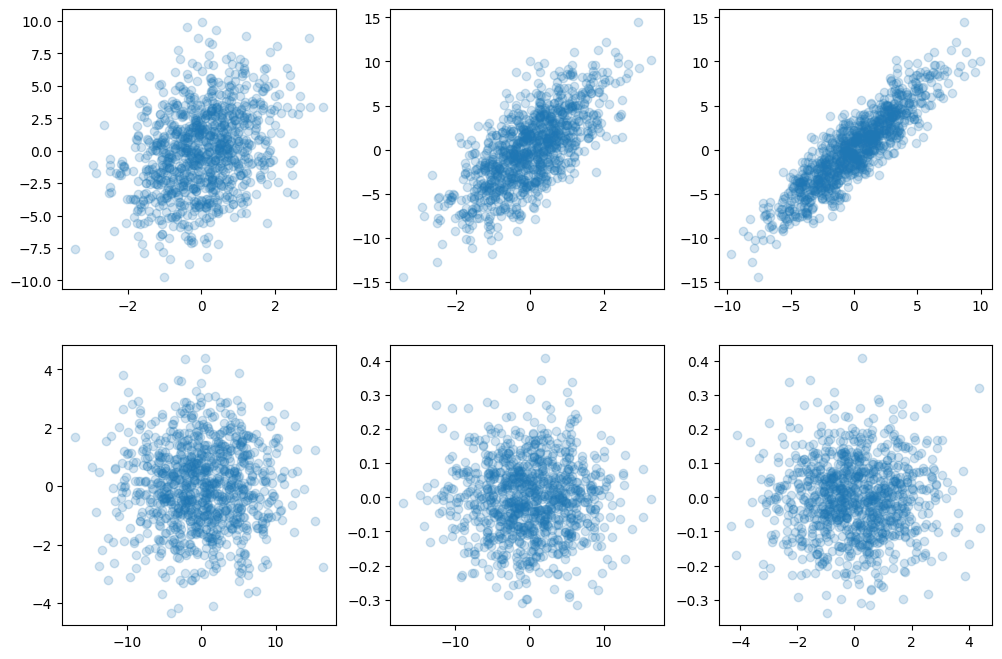

In [ ]:
#plot the data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
a = [(0,1), (0,2), (1,2)]
for i in range(3):
  ax[0,i].scatter(W[a[i][0],:], W[a[i][1],:], alpha=0.2)
  ax[1,i].scatter(Wp[a[i][0],:], Wp[a[i][1],:], alpha=0.2)

# Now the third variable has some (normal) variability as shown in the third rotated plot

3 \. **Looking at an oscillating spring**

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates.

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


Spring motion with constant $k$

$m\ddot{x} = -kx \implies x(t)=A\:\text{cos}\left(t\sqrt{\dfrac{k}{m}}\right)$

Snap picture at constant frequency $f^2<<\dfrac{k}{m}$

$x_j = A\:\text{cos}\left(\dfrac{j}{f}\sqrt{\dfrac{k}{m}}\right) = A\:\text{cos}\left(\gamma j\right)$

In [49]:
#The problem is not really clear as a camera would see the projected motion not the rotated motion
#The results make sort of sense but the values

from scipy.spatial.transform import Rotation as R

A, gamma, N, n = 10, 1/30, 1000, 6 #gamma should not be a multiple of pi otherwise we sample the same points
X = A*np.sin(gamma*np.arange(N).reshape(1, N)) #harmonic oscillation of amplitude 5
Y = npr.normal(0, 1/100, size=(1, N)) #random normal noise of stdev 0.01
Z = np.zeros(shape=(1, N))
data = np.concatenate((X,Y,Z), axis=0)
tower = data.copy()

#Build the matrix with all the rotations
for i in range(1, n+1):
  for j in range(1, n+1):
    theta, phi = 360*i/n, 180*j/n
    rot = R.from_euler('ZY', [phi, theta])
    brick = rot.apply(data.T)
    tower = np.concatenate((tower, brick.T), axis=0)

#Perform the PCA
U, S, R = la.svd(tower)
pcavals = S**2/(N-1)
print(pcavals)

#The first value is the x oscillation, the second is the y noise

[1.86795764e+03 3.76454977e-03 3.77784961e-28 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.86497280e-29 1.86497280e-29 1.86497280e-29
 1.86497280e-29 1.864972

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/